In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON data
df = pd.read_json('products.json')
df


,name,price,orders,rating
0,Fashion Soft Knitted Neck Warmer Sports Scarf ...,TND5.51,10000,4.4
1,Neck Beauty Instrument Face Lifting Machine Ma...,TND81.8,10000,4.9
2,Mini Portable EMS Neck Massager Electric Neck ...,TND4.48,5000,4.5
3,Outdoor Sport Bandana Military Tube Scarf Fish...,TND8.76,5000,4.7
4,Hot Cervical Pillow Spine Sleeping Neck Massag...,TND86.22,5000,4.9
5,FTCY 3pcs Women's Pearl Necklace Set 14K Gold ...,TND1.67,5000,4.5
6,New Beads Women's Neck Chain Kpop Pearl Choker...,TND1.82,4000,4.6
7,Fashionable Choker with Pendant Graceful Bowkn...,TND2.95,4000,4.5
8,LATS Retro Cute Small Leather Bag Long Necklac...,TND4.78,4000,4.9
9,1Pcs Back Brace Posture Corrector for Men and ...,TND36.75,4000,3.8


In [2]:
# Remove "TND" and any non-numeric characters except decimal points
df['price'] = df['price'].astype(str).str.replace('TND','').str.strip()
df['price']=pd.to_numeric(df['price'], errors='coerce')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    20 non-null     object 
 1   price   20 non-null     float64
 2   orders  20 non-null     int64  
 3   rating  20 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 772.0+ bytes


Top 10 Winning Products:
                                                 name   price  orders  rating  \
1   Neck Beauty Instrument Face Lifting Machine Ma...   81.80   10000     4.9   
5   FTCY 3pcs Women's Pearl Necklace Set 14K Gold ...    1.67    5000     4.5   
3   Outdoor Sport Bandana Military Tube Scarf Fish...    8.76    5000     4.7   
2   Mini Portable EMS Neck Massager Electric Neck ...    4.48    5000     4.5   
8   LATS Retro Cute Small Leather Bag Long Necklac...    4.78    4000     4.9   
11  Fashion Simple Candy Color Tassel Necklace for...    3.25    4000     4.8   
6   New Beads Women's Neck Chain Kpop Pearl Choker...    1.82    4000     4.6   
10  Simple Trendy Star Hollow Choker Necklace Pend...    2.90    4000     4.5   
7   Fashionable Choker with Pendant Graceful Bowkn...    2.95    4000     4.5   
15  Fashion Sexy Punk Gothic Black Velvet Choker N...    2.18    3000     4.8   
14  Car Memory Foam Neck Pillow Protection Lumbar ...   12.72    3000     4.7   
17 

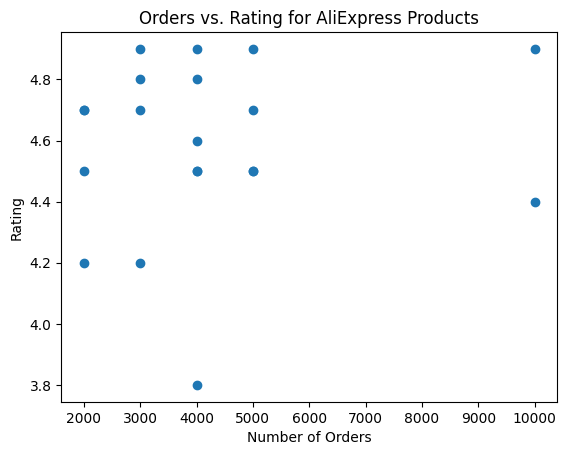

In [ ]:


# Filter for high-rated products
filtered_df = df[df['rating'] >= 4.5]

# Sort by orders (descending)
sorted_df = filtered_df.sort_values(by='orders', ascending=False)

# Calculate composite score with price
max_orders = df['orders'].max()
max_rating = 5
max_price = df['price'].max()

# Weights for each component (sum to 1)
weight_orders = 0.3
weight_rating = 0.4
weight_price = 0.3

# Normalize and calculate score with stronger price penalty
sorted_df['score'] = (
    (sorted_df['orders'] / max_orders) * weight_orders +
    (sorted_df['rating'] / max_rating) * weight_rating +
    ((max_price - sorted_df['price']) / max_price)**2 * weight_price  # Square the price component
)


# Sort by score
final_df = sorted_df.sort_values(by='score', ascending=False)

# Display top 10 winning products
print("Top 10 Winning Products:")
print(final_df[['name', 'price', 'orders', 'rating', 'score']].head(30))

# Visualize orders vs. rating
plt.scatter(df['orders'], df['rating'])
plt.xlabel('Number of Orders')
plt.ylabel('Rating')
plt.title('Orders vs. Rating for AliExpress Products')
plt.show()
